<h1>
<font>Steganalysis</font>
</h1>

In [1]:
import numpy as np
from PIL import Image

<h2>
<font>Encode function</font>
</h2>

In [2]:
def Encode(src, message, dest):
    '''
    src: source image path
    message: message to be encoded
    dest: destination image path

    Encodes the message into the image and saves it to the destination path provided by the user
    '''

    img = Image.open(src, 'r') # open the image
    width, height = img.size # get the dimensions of the image
    array = np.array(list(img.getdata())) # convert the image data to a numpy array
    print(img.mode) # get the mode of the image

    if img.mode == 'RGB': # if the image is in RGB mode
        n = 3 # n is the number of channels in the image
    elif img.mode == 'RGBA': # if the image is in RGBA mode
        n = 4 # n is the number of channels in the image
    total_pixels = array.size//n # total number of pixels in the image

    message += "$t3g0" # add a stopping criteria to the message
    b_message = ''.join([format(ord(i), "08b") for i in message]) # convert the message to binary
    req_pixels = len(b_message) # number of pixels required to encode the message

    if req_pixels > total_pixels: # if the number of pixels required to encode the message is greater than the total number of pixels in the image
        print("ERROR: Need larger file size. Provide a larger image or a smaller message to encode.")

    else:
        index = 0 # initialize the index to 0
        for p in range(total_pixels): # iterate through the total number of pixels in the image
            for q in range(0, 3): # iterate through the number of channels in the image
                if index < req_pixels: # if the index is less than the number of pixels required to encode the message
                    array[p][q] = int(bin(array[p][q])[2:9] + b_message[index], 2) # encode the message into the image
                    index += 1 # increment the index

        array=array.reshape(height, width, n) # reshape the array to the dimensions of the image
        enc_img = Image.fromarray(array.astype('uint8'), img.mode) # convert the array to an image
        enc_img.save(dest) # save the image to the destination path provided by the user
        print("Image Encoded Successfully") # print a success message

<h2>
<font>Decode function</font>
</h2>

In [3]:
def Decode(src):
    '''
    src: source image path

    Decodes the message from the image and prints it to the console.
    '''

    img = Image.open(src, 'r') # open the image
    array = np.array(list(img.getdata())) # convert the image data to a numpy array

    if img.mode == 'RGB':
        n = 3
    elif img.mode == 'RGBA':
        n = 4
    total_pixels = array.size//n

    hidden_bits = "" # initialize a variable to store the hidden bits
    for p in range(total_pixels): # iterate through the total number of pixels in the image
        for q in range(0, 3): # iterate through the number of channels in the image
            hidden_bits += (bin(array[p][q])[2:][-1]) # extract the least significant bit from each pixel

    hidden_bits = [hidden_bits[i:i+8] for i in range(0, len(hidden_bits), 8)] # split the hidden bits into groups of 8

    message = "" # initialize a variable to store the message
    for i in range(len(hidden_bits)): # iterate through the hidden bits
        if message[-5:] == "$t3g0": # check if the stopping criteria is reached
            break
        else:
            message += chr(int(hidden_bits[i], 2)) # convert the hidden bits to characters and append them to the message
    if "$t3g0" in message: # check if the stopping criteria is reached
        print("Hidden Message:", message[:-5]) # print the hidden message
    else:
        print("No Hidden Message Found.")

<h2>
<font>Menu</font>
</h2>

In [28]:
def Stego():
    print("--Welcome to steganography program--")
    print("1: Encode message into image.")
    print("2: Decode message from image.")

    func = input() # get the function to be performed from the user

    if func == '1': # if the user chooses to encode a message into an image
        print("Enter Source Image Path.")
        src = input()
        print("Enter Message to Hide.")
        message = input()
        print("Enter Destination Image Path.")
        dest = input()
        print("Encoding...")
        Encode(src, message, dest) # call the Encode function

    elif func == '2': # if the user chooses to decode a message from an image
        print("Enter Source Image Path.")
        src = input()
        print("Decoding...")
        Decode(src) # call the Decode function

    else: # if the user chooses an invalid option
        print("ERROR: Invalid option chosen")

<h2>
<font>Encode the input image</font>
</h2>

In [30]:
if __name__ == "__main__":
    Stego()

--Welcome to steganography program--
1: Encode message into image.
2: Decode message from image.
1
Enter Source Image Path.
farzan.png
Enter Message to Hide.
security of computer systems
Enter Destination Image Path.
farzan_encoded.png
Encoding...
RGBA
Image Encoded Successfully


<h2>
<font>Show the encoded image</font>
</h2>

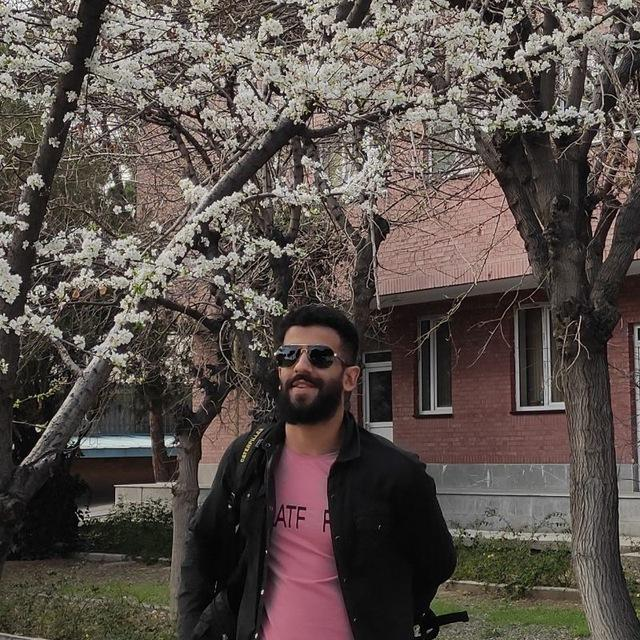

In [31]:
# encode = Image.open("2.png")
encode = Image.open("farzan_encoded.jpg")
# encode.show()
encode

<h2>
<font>Decode the encoded image</font>
</h2>

In [33]:
if __name__ == "__main__":
    Stego()

--Welcome to steganography program--
1: Encode message into image.
2: Decode message from image.
2
Enter Source Image Path.
farzan_encoded.png
Decoding...
Hidden Message: security of computer systems
